## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [43]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [44]:
df = pd.read_csv("ab_data.csv")

b. Use the cell below to find the number of rows in the dataset.

In [45]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [46]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

d. The proportion of users converted.

In [47]:
print("{0:.3%}".format(df["converted"].mean()))

11.966%


e. The number of times the `new_page` and `treatment` don't match.

In [48]:
df.columns

Index(['user_id', 'timestamp', 'group', 'landing_page', 'converted'], dtype='object')

In [49]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [50]:
diff = df.query('(group == "treatment" and landing_page !="new_page" ) or (group != "treatment" and landing_page =="new_page")' )
diff['user_id'].count()

3893

f. Do any of the rows have missing values?

In [51]:
df.isnull().values.any() # There is no missing values

False

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [52]:
df2 = df.drop(df.query('(group == "treatment" and landing_page !="new_page" ) or (group != "treatment" and landing_page =="new_page")').index)
df2

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [53]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [54]:
df2["user_id"].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [55]:
sum(df2['user_id'].duplicated())


1

In [56]:
df2[df2.duplicated("user_id")]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [57]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [58]:
df2.drop(1899, inplace = True)
df2[df2.duplicated(['user_id'], keep=False)]


,user_id,timestamp,group,landing_page,converted


In [59]:
df2[df2.duplicated("user_id")]

,user_id,timestamp,group,landing_page,converted


In [60]:
sum(df2['user_id'].duplicated()) # there is no dublicated


0

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [61]:
converted_users = df2["converted"].mean()
print("{0:0.2%}".format(converted_users))

11.96%


b. Given that an individual was in the `control` group, what is the probability they converted?

In [62]:
individual_1 = df2.query('group == "control" and converted == 1')["user_id"].nunique()

# Get dataframe with all records from control group 
control_1 = df2.query('group == "control"')['user_id'].nunique()

c1 = individual_1 / control_1
print("{0:.2%}".format(c1))


12.04%


In [63]:
# another check to ensure accuracy using mean
print("{0:.2%}".format(df2.query('group == "control"')["converted"].mean()))

12.04%


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [64]:
individual_2 = df2.query('group == "treatment" and converted == 1')["user_id"].nunique()

# Get dataframe with all records from treatment group 
control_2 = df2.query('group == "treatment"')['user_id'].nunique()

c2 = individual_2/control_2

print("{0:.2%}".format(c2))

11.88%


d. What is the probability that an individual received the new page?

In [65]:
individual_3 = df2.query('landing_page == "new_page"')["user_id"].nunique()

c3 = individual_3/df2.shape[0]
print("{0:.2%}".format(c3))

50.01%


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

1. OverAll conversions: 11.96%
2. Control Conversions: 12.04%
3. Treatment Conversions: 11.88%
The Treatment shows a decrease in conversions by 0.08%, while the control increases by 0.08%, However, this difference is so small, which cannot tell us which is the best, the old or the new page, may need more test to get more  evidence.
Consider this test, old page is more effective than the new page, where both group recvieved the pages almost equally (50.01%).


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**H_0**: The new page is worse, or only as good as the old page.
$$H_0: P_{new} <= P_{old} $$

**H_1**: The new page is better.
$$H_1: P_{new} > P_{old} $$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [66]:
p_new = df2["converted"].mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [67]:
p_old = df2["converted"].mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [68]:
n_new = df2.query('landing_page == "new_page" and group == "treatment"').count()
n_new

user_id         145310
timestamp       145310
group           145310
landing_page    145310
converted       145310
dtype: int64

d. What is $n_{old}$, the number of individuals in the control group?

In [69]:
n_old = df2.query('landing_page == "old_page" and group == "control"').count()
n_old

user_id         145274
timestamp       145274
group           145274
landing_page    145274
converted       145274
dtype: int64

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [70]:
n_new_converted = np.random.binomial(1, p_new, n_new[0])
n_new_converted.mean()

0.11896634780813434

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [71]:
n_old_converted = np.random.binomial(1, p_old, n_old[0])
n_old_converted.mean()

0.12112284372977959

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [72]:
n_new_converted.mean() - n_old_converted.mean()

-0.0021564959216452545

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [73]:
p_diffs = []
for _ in range(10000):
    n_new_converted = np.random.binomial(1, p_new, n_new[0])
    n_old_converted = np.random.binomial(1, p_old, n_old[0])
    p_diffs.append(n_new_converted.mean() - n_old_converted.mean())

In [74]:
p_diffs

[0.00068612644627580321,
 -0.00090377785135109523,
 -0.000366905743480056,
 -0.0017089939230749279,
 2.56575097609818e-05,
 -0.00071105396211956773,
 -0.0013027778413528951,
 0.0021730282705838683,
 -0.00095200700041522812,
 0.0012575441780357383,
 0.00033495143219723633,
 0.0014362127710172423,
 0.0014981544365789551,
 0.0010785106354670726,
 0.00093401760067157724,
 -9.1659476337116463e-05,
 -0.0024663611436688965,
 -0.0010205269486056184,
 -0.00094501260704232815,
 -0.00025684236728408527,
 0.00019739651350186849,
 -0.0015919532072250497,
 0.001112952231669892,
 0.0014638731453349846,
 -0.0004563798804668312,
 0.0013609013687103655,
 0.00034884130737269925,
 0.0011885586633159362,
 -0.0013441848396062717,
 -0.00057315626367178407,
 0.00047950244963741728,
 -0.00016732218525593312,
 -0.00057374461697819179,
 -0.00019475062899491913,
 -0.00070436653568914376,
 -0.0007936121528409612,
 -0.0008211565618693184,
 -0.00080049058092448999,
 0.00056226699035902272,
 0.00075490902173920571,
 

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([    8.,    95.,   533.,  1597.,  2961.,  2779.,  1464.,   471.,
           82.,    10.]),
 array([ -4.70288543e-03,  -3.75379936e-03,  -2.80471330e-03,
         -1.85562723e-03,  -9.06541160e-04,   4.25449077e-05,
          9.91630975e-04,   1.94071704e-03,   2.88980311e-03,
          3.83888918e-03,   4.78797525e-03]),
 <a list of 10 Patch objects>)

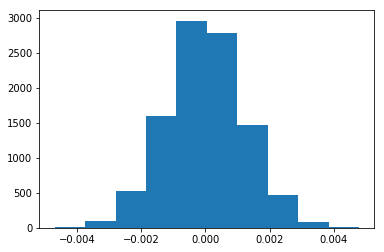

In [75]:
plt.hist(p_diffs)

**Does this plot look like what I expected?**

Yes, according to **Central Limit Theorem**, given a sufficiently large sample size, the sampling distribution of the mean for a variable will approximate a normal distribution regardless of that variable's distribution in the population.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [76]:
# Compute actual difference observed in original dataset ab_data.csv
obs_diff = df2.query('group == "treatment"')["converted"].mean() - df.query('group == "control"')["converted"].mean()
obs_diff

-0.0015911138438704647

In [77]:
p_diffs

[0.00068612644627580321,
 -0.00090377785135109523,
 -0.000366905743480056,
 -0.0017089939230749279,
 2.56575097609818e-05,
 -0.00071105396211956773,
 -0.0013027778413528951,
 0.0021730282705838683,
 -0.00095200700041522812,
 0.0012575441780357383,
 0.00033495143219723633,
 0.0014362127710172423,
 0.0014981544365789551,
 0.0010785106354670726,
 0.00093401760067157724,
 -9.1659476337116463e-05,
 -0.0024663611436688965,
 -0.0010205269486056184,
 -0.00094501260704232815,
 -0.00025684236728408527,
 0.00019739651350186849,
 -0.0015919532072250497,
 0.001112952231669892,
 0.0014638731453349846,
 -0.0004563798804668312,
 0.0013609013687103655,
 0.00034884130737269925,
 0.0011885586633159362,
 -0.0013441848396062717,
 -0.00057315626367178407,
 0.00047950244963741728,
 -0.00016732218525593312,
 -0.00057374461697819179,
 -0.00019475062899491913,
 -0.00070436653568914376,
 -0.0007936121528409612,
 -0.0008211565618693184,
 -0.00080049058092448999,
 0.00056226699035902272,
 0.00075490902173920571,
 

In [78]:
# Proportion of p_diffs greater than the actual difference
# observedin original dataset
(p_diffs > obs_diff).mean()

0.90649999999999997

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

<li>This is p-value, the probability of observing our statistics if the null hypothesis is true.</li>

<li>A small p-value indicates strong evidence against the null hypothesis, and we reject the null hypothesis.</li>

<li>A large p-value indicates weak evidence against the null hypothesus, so we fail to reject the null hypothesis.</li>

<li> The p-value here is very big so we fail to reject the null hypothesis, which tell us that there is no conversion advantages with new pages.


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [79]:
import statsmodels.api as sm

convert_old = sum(df2.query("landing_page == 'old_page'")["converted"])
convert_new = sum(df2.query("landing_page == 'new_page'")["converted"])
n_old = df2.query("landing_page == 'old_page'").shape[0]
n_new = df2.query("landing_page == 'new_page'").shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [80]:
import statsmodels.api as sm

z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new])
print(z_score, p_value)

1.31092419842 0.189883374482


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The **Z-value** is a test statistic for Z-tests that measures the difference between an observed statistic(the difference between conversion rates) and its hypothesized population parameter in units of the standard deviation,
helps us decide whether or not to reject the null.
which is 1.31 here, This is less than the critical 1.96, So we accept the null hypothesis.

Also the large p-value tells us that there is no enough evidence to regect the null hypothesis.

These values agree with the findings in parts j. and k.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

We should use **Logistic Regression**, since it predicts a probability between categorical data

And in this dataset we want to predict 1 of 2 possibles, whether a user will convert or not, depending on the page type, whether it is new or old page.  


b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [81]:
df2["Intercept"] = 1
df2[['Control', 'ab_page']] = pd.get_dummies(df['group'])
df2[['new_page', 'old_page']] = pd.get_dummies(df['landing_page'])
df2.head(5)

,user_id,timestamp,group,landing_page,converted,Intercept,Control,ab_page,new_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,0,1


In [82]:
# After creating ab_page, we donot need the Control column
df2.drop("Control",axis = 1,inplace = True)
df2

,user_id,timestamp,group,landing_page,converted,Intercept,ab_page,new_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,1,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0,0,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,1,0
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [83]:
import statsmodels.api as sm

regression_model = sm.Logit(df2['converted'], df2[['Intercept', 'ab_page']])
fitting = regression_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [85]:
# I get errors without the code belos
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

fitting.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 11 Nov 2020   Pseudo R-squ.:               8.077e-06
Time:                        16:46:16   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

Our Hypothesis is :
<li>$$H_0: P_{new} = P_{old} $$ </li>
<li>$$H_1: P_{new} != P_{old} $$ </li>


The p-value associated with ab_page is 0.190, which is differ from partII, as A/B Test the null and alternative hypothesis are different from part 3.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

** So far, It seems that the features we used to make our decision doesnot affect on user convertion.
Therefore, it maybe a good idea to add more factors.
But one of the most disavantages of adding additional term into regression model is collineary.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [87]:
country_df = pd.read_csv("countries.csv")
country_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [88]:
df2.head()

,user_id,timestamp,group,landing_page,converted,Intercept,ab_page,new_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0,1


In [90]:
# We will merge with user_id 
df_new = country_df.set_index('user_id').join(df2.set_index('user_id'), how = 'inner')
df_new

,country,timestamp,group,landing_page,converted,Intercept,ab_page,new_page,old_page
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0
909908,UK,2017-01-06 20:44:26.334764,treatment,new_page,0,1,1,1,0
811617,US,2017-01-02 18:42:11.851370,treatment,new_page,1,1,1,1,0
938122,US,2017-01-10 09:32:08.222716,treatment,new_page,1,1,1,1,0
887018,US,2017-01-06 11:09:40.487196,treatment,new_page,0,1,1,1,0


In [91]:
df_new['country'].unique() # We have three countries

array(['UK', 'US', 'CA'], dtype=object)

In [96]:
# We will create dummies values only for the unique three countries
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])

In [103]:
country_logit = sm.Logit(df_new['converted'], df_new[['Intercept', 'ab_page', 'CA', 'UK']])
fitting_2 = country_logit.fit()


Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [104]:
fitting_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Wed, 11 Nov 2020   Pseudo R-squ.:               2.323e-05
Time:                        17:30:13   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

The p-values are greater than 0.05, So we canot reject the null hypothesis.

In [110]:
1/np.exp(-0.0408), np.exp(0.0099)


(1.0416437559600236, 1.0099491671175422)

CA is 1.04 times LESS likely to convert

UK is 1.01 times MORE likely to convert

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [108]:
df_new['CA_page'] = df_new['CA']*df_new['ab_page']
df_new['UK_page'] = df_new['UK']*df_new['ab_page']
df_new['US_page'] = df_new['US']*df_new['ab_page']
logit_mod = sm.Logit(df_new['converted'], df_new[['Intercept', 'CA_page', 'UK_page']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 11 Nov 2020   Pseudo R-squ.:               2.364e-05
Time:                        17:38:59   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                   0.08085
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9963      0.006   -322.049      0.000      -2.008      -1.984
CA_page       -0.0752      0.038     -1.997      0.046      -0.149      -0.001
UK_page        0.0149      0.017      0.862      0.389      -0.019       0.049
==============================================================================
"""

One p-value does present as statistically significant: the interaction of CA and ab_page (p = 0.046; p < 0.05).

In [109]:
1/np.exp(-0.0752), np.exp(0.0149)


(1.0780997492739288, 1.0150115583846535)

CA is 1.078 times LESS likely to convert

UK is 1.015 times MORE likely to convert


<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [112]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0